<a href="https://colab.research.google.com/github/nataliashalaeva/ml/blob/main/Shalaeva_ind_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

1. Предварительная обработка данных:
   а) Загрузка и исследование датасета;
   б) Проверка пропущенных значений и их обработка (например, удаление или заполнение);
   в) Проверка и обработка дубликатов (например, удаление повторяющихся записей);
   г) Кодирование категориальных признаков (например, использование one-hot encoding или label encoding);
   д) Масштабирование числовых признаков (например, стандартизация или нормализация);
   е) Удаление выбросов (например, на основе статистических метрик или методов обнаружения выбросов).


In [42]:
df = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

In [35]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 48187 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48187 non-null  float64
 2   rain_1h              48187 non-null  float64
 3   snow_1h              48187 non-null  float64
 4   clouds_all           48187 non-null  int64  
 5   weather_main         48187 non-null  object 
 6   weather_description  48187 non-null  object 
 7   date_time            48187 non-null  object 
 8   traffic_volume       48187 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.7+ MB
None


In [43]:
print(df.describe())

               temp       rain_1h       snow_1h    clouds_all  traffic_volume  \
count  4.818700e+04  48187.000000  4.818700e+04  4.818700e+04    48187.000000   
mean  -6.605996e-16      0.000000  8.257495e-18 -7.077853e-18     3259.618134   
std    1.000010e+00      1.000010  1.000010e+00  1.000010e+00     1986.954465   
min   -2.108205e+01     -0.007464 -2.723315e-02 -1.265300e+00        0.000000   
25%   -6.781068e-01     -0.007464 -2.723315e-02 -1.239669e+00     1192.500000   
50%    9.333855e-02     -0.007464 -2.723315e-02  3.751024e-01     3379.000000   
75%    7.947615e-01     -0.007464 -2.723315e-02  1.041516e+00     4933.000000   
max    2.164021e+00    219.458010  6.240417e+01  1.297829e+00     7280.000000   

               hour     dayofweek         month  weather_main_Clouds  \
count  4.818700e+04  4.818700e+04  4.818700e+04         48187.000000   
mean  -4.792296e-17  8.021567e-17 -9.437138e-17             0.314566   
std    1.000010e+00  1.000010e+00  1.000010e+00       

In [63]:
print(df.head())

     temp  rain_1h  snow_1h  clouds_all  traffic_volume  hour  dayofweek  \
0  288.28      0.0      0.0          40            5545     9          1   
1  289.36      0.0      0.0          75            4516    10          1   
2  289.58      0.0      0.0          90            4767    11          1   
3  290.13      0.0      0.0          90            5026    12          1   
4  291.14      0.0      0.0          75            4918    13          1   

   month  weather_main_Clouds  weather_main_Drizzle  ...  \
0     10                  1.0                   0.0  ...   
1     10                  1.0                   0.0  ...   
2     10                  1.0                   0.0  ...   
3     10                  1.0                   0.0  ...   
4     10                  1.0                   0.0  ...   

   holiday_Independence Day  holiday_Labor Day  \
0                       0.0                0.0   
1                       0.0                0.0   
2                       0.0     

In [52]:
df.isnull().sum()
df.fillna(df.mean())

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,hour,dayofweek,month,weather_main_Clouds,weather_main_Drizzle,...,holiday_Independence Day,holiday_Labor Day,holiday_Martin Luther King Jr Day,holiday_Memorial Day,holiday_New Years Day,holiday_State Fair,holiday_Thanksgiving Day,holiday_Veterans Day,holiday_Washingtons Birthday,holiday_nan
0,288.28,0.0,0.0,40,5545,9,1,10,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,289.36,0.0,0.0,75,4516,10,1,10,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,289.58,0.0,0.0,90,4767,11,1,10,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,290.13,0.0,0.0,90,5026,12,1,10,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,291.14,0.0,0.0,75,4918,13,1,10,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48199,283.45,0.0,0.0,75,3543,19,6,9,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
48200,282.76,0.0,0.0,90,2781,20,6,9,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
48201,282.73,0.0,0.0,90,2159,21,6,9,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
48202,282.09,0.0,0.0,90,1450,22,6,9,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [35]:
df.drop_duplicates(inplace=True)

In [44]:
df['hour'].unique()

array([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,  0,  1,
        2,  3,  4,  5,  6,  8,  7], dtype=int32)

In [43]:
# Преобразование даты
df['date_time'] = pd.to_datetime(df['date_time'])
df['hour'] = df['date_time'].dt.hour
df['dayofweek'] = df['date_time'].dt.dayofweek
df['month'] = df['date_time'].dt.month
df.drop(['date_time'], axis=1, inplace=True)

In [45]:
# Кодирование категориальных признаков
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_features = encoder.fit_transform(df[['weather_main', 'holiday']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['weather_main', 'holiday']))
df = pd.concat([df, encoded_df], axis=1)
df.drop(['weather_main', 'holiday', 'weather_description'], axis=1, inplace=True)

In [11]:
# Масштабирование числовых признаков
scaler = StandardScaler()
numeric_features = ['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'hour', 'dayofweek', 'month']
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [46]:
#Удаление выбросов
z_scores = np.abs((df[numeric_features] - df[numeric_features].mean()) / df[numeric_features].std())
df = df[(z_scores < 3).all(axis=1)]

2. Визуализация данных:
   а) Построение графика распределения целевой переменной (например, количество трафика) и изучение ее формы;
   б) Визуализация зависимости количества трафика от различных признаков (например, времени суток, дня недели или погодных условий);
   в) Построение графиков корреляции между признаками и целевой переменной для выявления зависимостей.


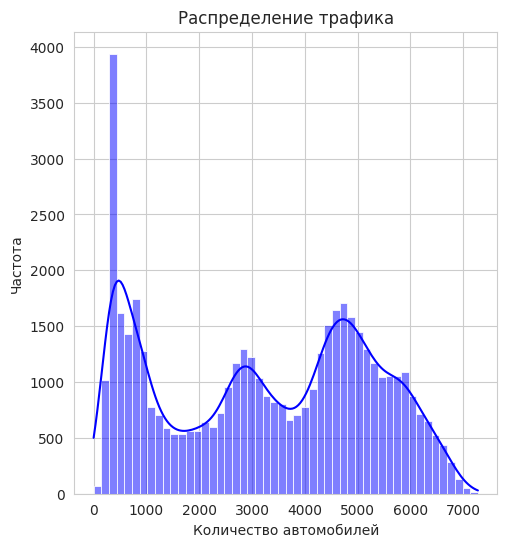

<ipython-input-51-3f3122b72997>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["hour"], y=df["traffic_volume"], palette="coolwarm")


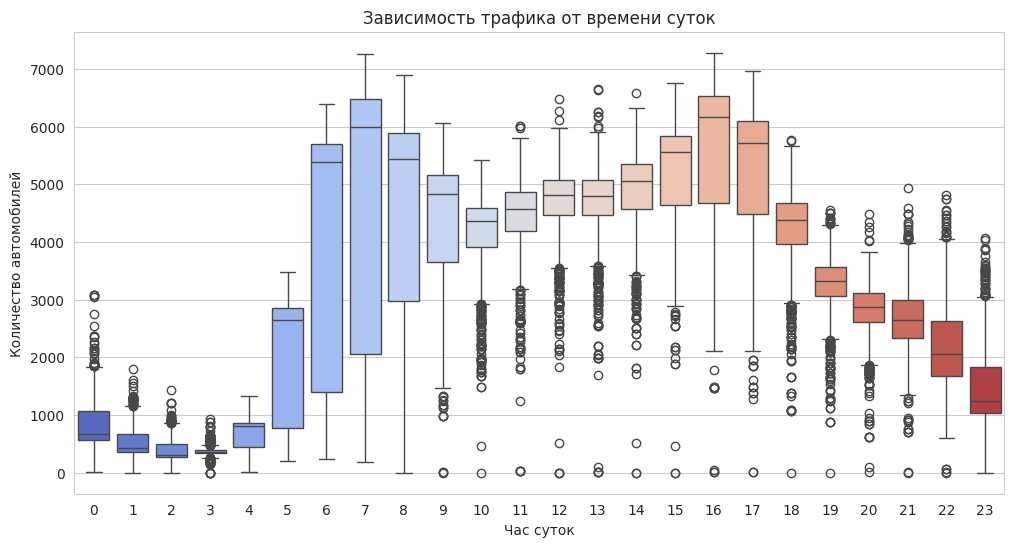

<ipython-input-51-3f3122b72997>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["dayofweek"], y=df["traffic_volume"], palette="coolwarm")


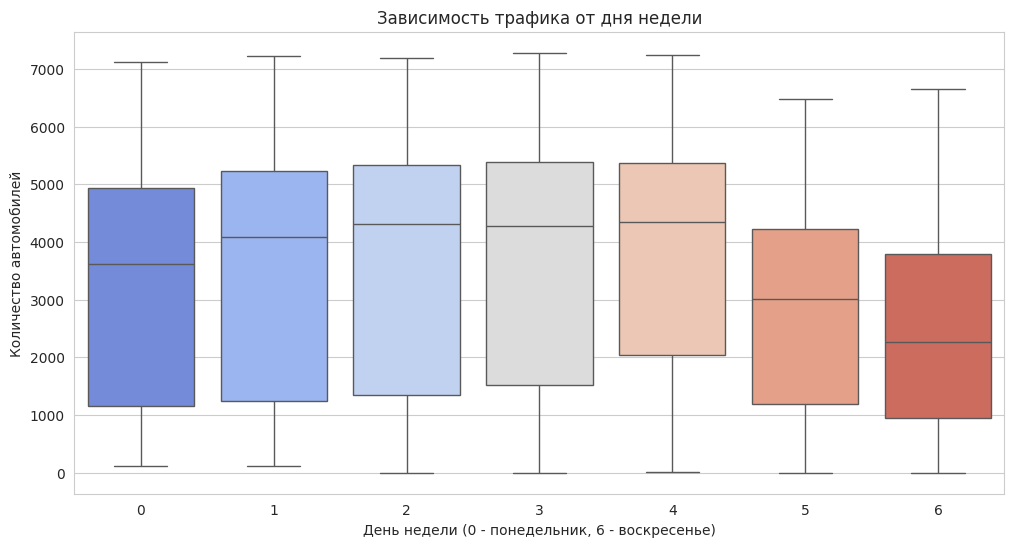

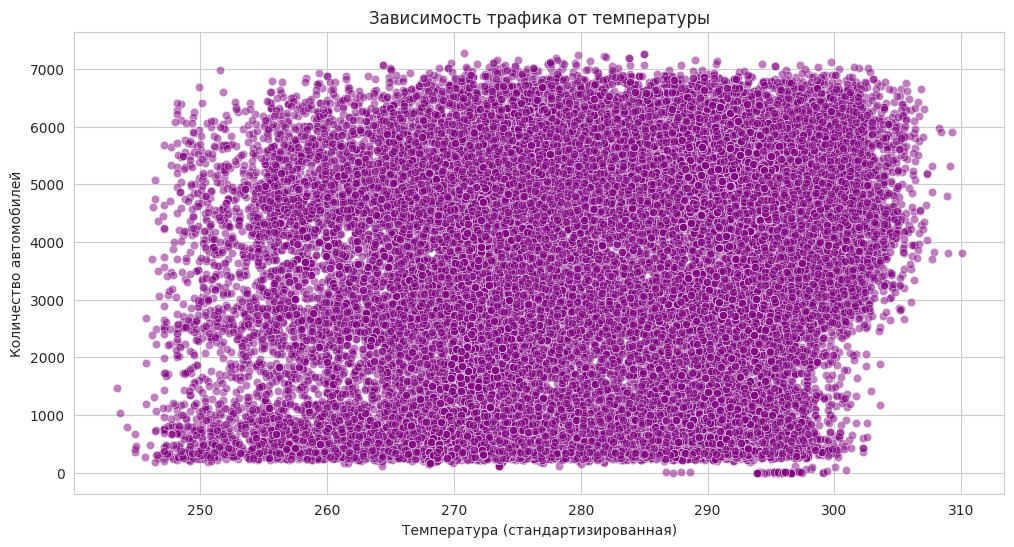

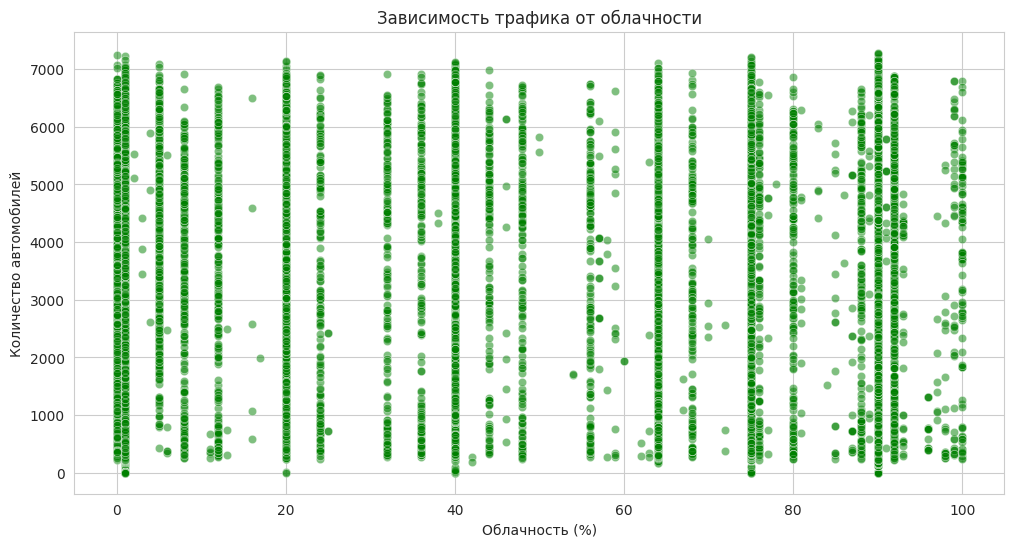

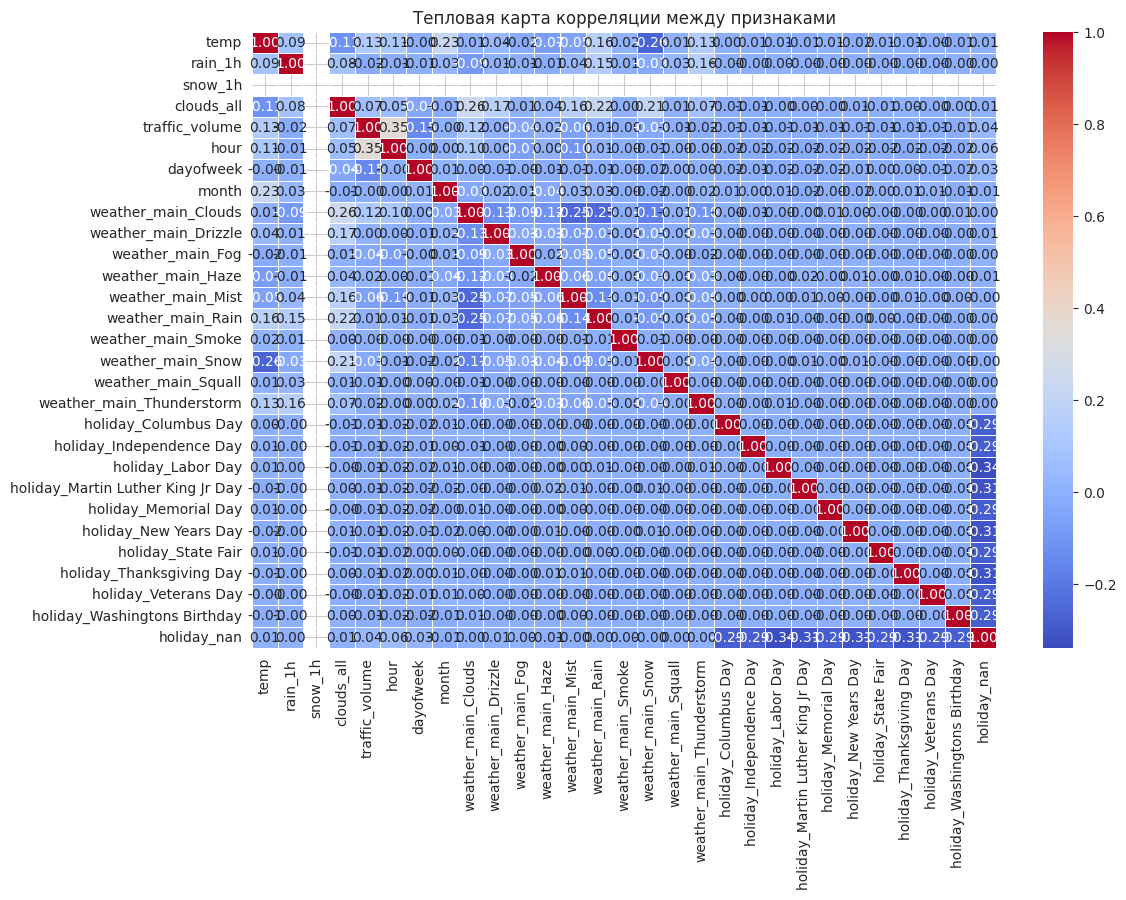

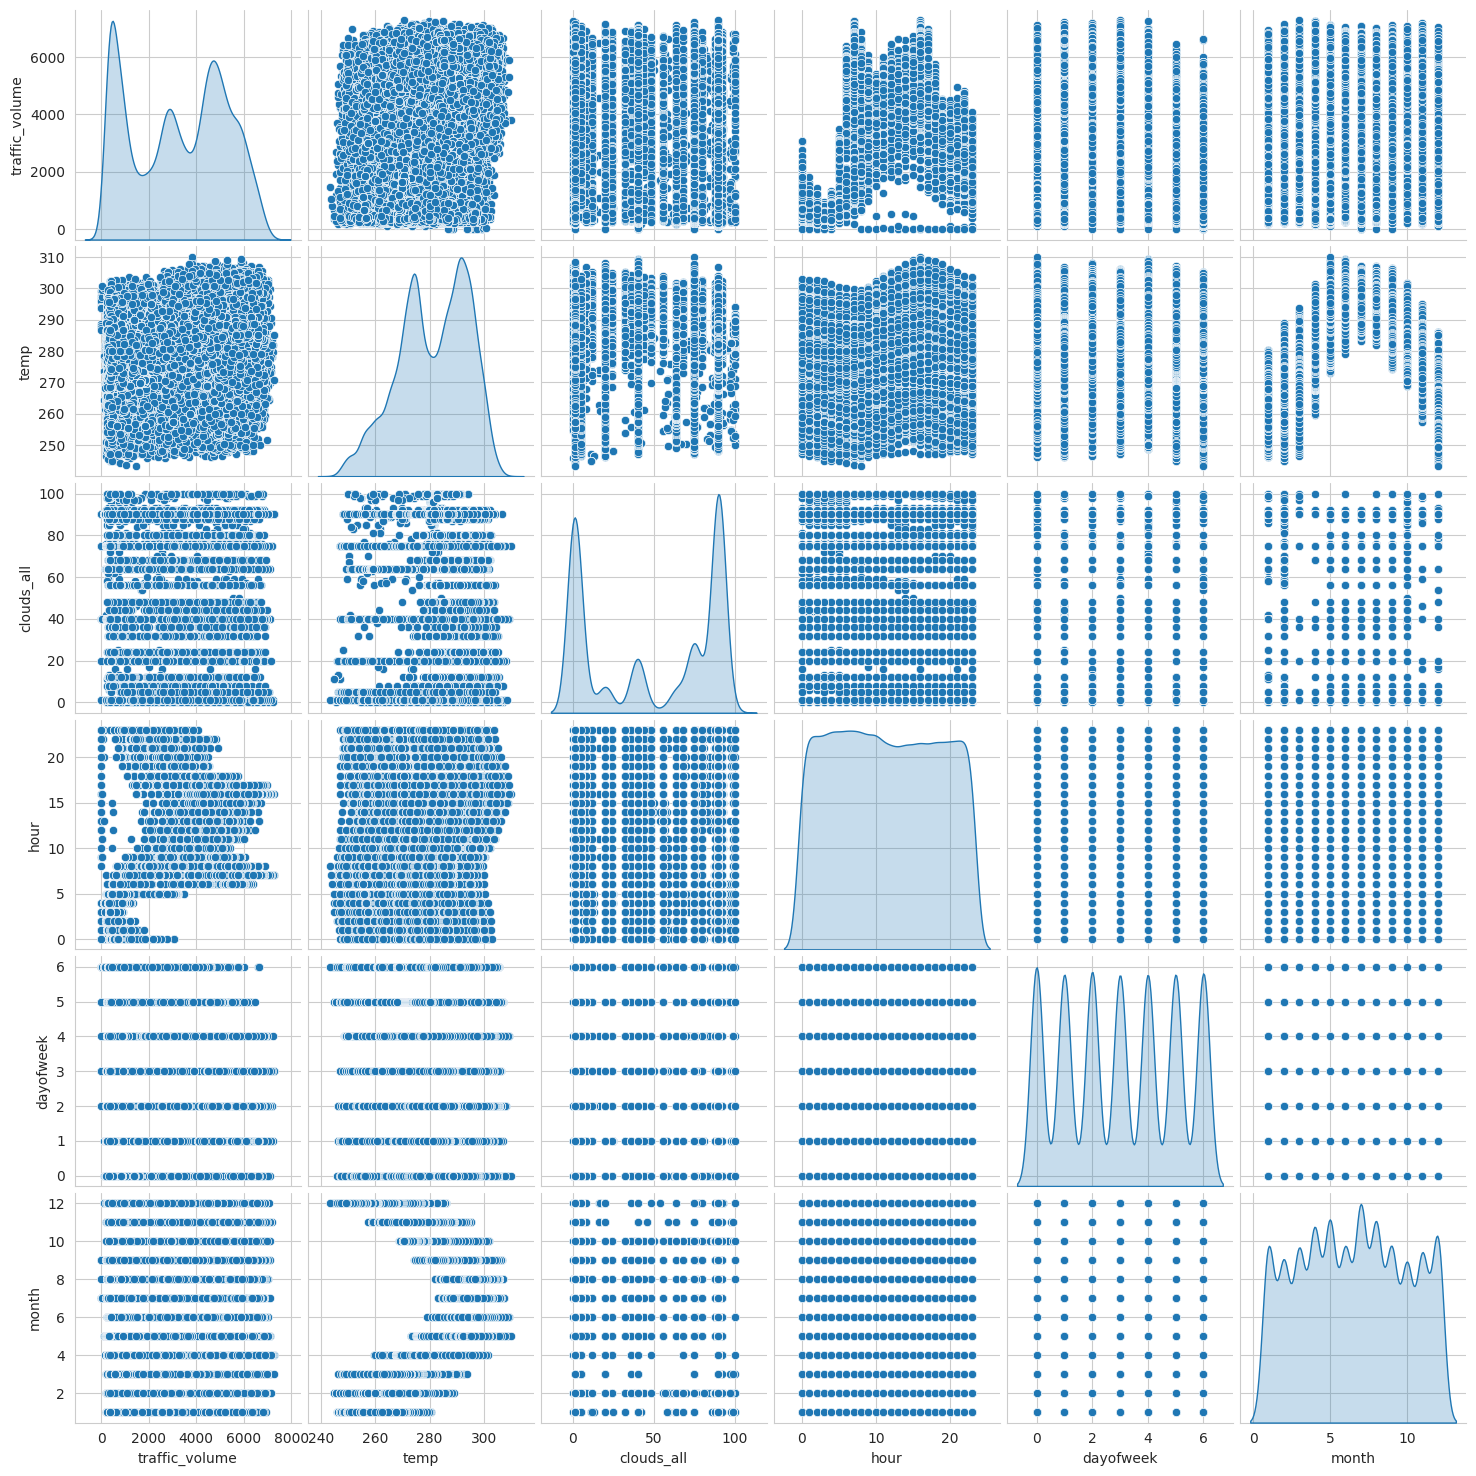

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# График распределения целевой переменной
plt.subplot(1, 2, 1)
sns.histplot(df['traffic_volume'], bins=50, kde=True, color="blue")
plt.title("Распределение трафика")
plt.xlabel("Количество автомобилей")
plt.ylabel("Частота")

plt.show()

# Визуализация зависимости количества трафика от времени суток и дня недели
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["hour"], y=df["traffic_volume"], palette="coolwarm")
plt.title("Зависимость трафика от времени суток")
plt.xlabel("Час суток")
plt.ylabel("Количество автомобилей")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=df["dayofweek"], y=df["traffic_volume"], palette="coolwarm")
plt.title("Зависимость трафика от дня недели")
plt.xlabel("День недели (0 - понедельник, 6 - воскресенье)")
plt.ylabel("Количество автомобилей")
plt.show()

# График зависимости от температуры и облачности
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df["temp"], y=df["traffic_volume"], alpha=0.5, color="purple")
plt.title("Зависимость трафика от температуры")
plt.xlabel("Температура (стандартизированная)")
plt.ylabel("Количество автомобилей")
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x=df["clouds_all"], y=df["traffic_volume"], alpha=0.5, color="green")
plt.title("Зависимость трафика от облачности")
plt.xlabel("Облачность (%)")
plt.ylabel("Количество автомобилей")
plt.show()

# Построение тепловой карты корреляции
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Тепловая карта корреляции между признаками")
plt.show()

# Диаграммы рассеяния для основных переменных
sns.pairplot(df, vars=['traffic_volume', 'temp', 'clouds_all', 'hour', 'dayofweek', 'month'], diag_kind='kde')
plt.show()


3. Построение регрессии:
   а) Разделение данных на обучающую и тестовую выборки;
   б) Выбор и настройка модели регрессии (например, линейной регрессии);
   в) Обучение модели на обучающей выборке;
   г) Оценка модели на тестовой выборке с использованием метрик регрессии (например, среднеквадратической ошибки или R-квадрата);
   д) Подбор гиперпараметров модели (например, с использованием кросс-валидации или GridSearchCV);
   е) Повторение обучения и оценки модели с учетом подобранных гиперпараметров.


In [54]:
# Определение целевой переменной и признаков
X = df.drop(columns=['traffic_volume'])
y = df['traffic_volume']

In [55]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Обучение модели
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Предсказания
y_pred = model.predict(X_test)

# Оценка модели
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Средняя абсолютная ошибка (MAE): {mae}")
print(f"Среднеквадратичная ошибка (MSE): {mse}")
print(f"Коэффициент детерминации (R²): {r2}")

Средняя абсолютная ошибка (MAE): 254.97743794584116
Среднеквадратичная ошибка (MSE): 204191.4066173199
Коэффициент детерминации (R²): 0.9476044955364357



Метрики для Линейной регрессии:
MAE: 1584.17231222777
MSE: 3285422.2655679407
R²: 0.15696081518810845

Метрики для RandomForest (с оптимальными параметрами):
Лучшие параметры: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
MAE: 254.1045882740462
MSE: 201207.21996008616
R²: 0.9483702376796015


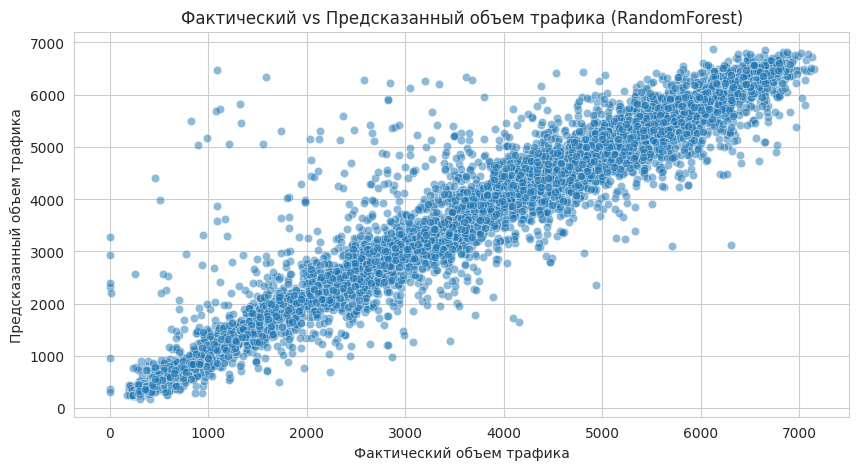

In [58]:
# 1. Линейная регрессия
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)

print("\nМетрики для Линейной регрессии:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lr)}")
print(f"R²: {r2_score(y_test, y_pred_lr)}")

# 2. RandomForest с подбором гиперпараметров
param_grid = {
    'n_estimators': [100],
    'max_depth': [10, None],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Лучшая модель
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print("\nМетрики для RandomForest (с оптимальными параметрами):")
print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_rf)}")
print(f"R²: {r2_score(y_test, y_pred_rf)}")

# Визуализация предсказаний
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.5)
plt.xlabel("Фактический объем трафика")
plt.ylabel("Предсказанный объем трафика")
plt.title("Фактический vs Предсказанный объем трафика (RandomForest)")
plt.show()

4. Оценка и интерпретация результатов:
   а) Анализ метрик регрессии для определения качества модели;
   б) Интерпретация коэффициентов модели и их связь с предикторами;
   в) Построение предсказаний для новых данных на основе обученной модели;
   г) Анализ значимости вклада различных признаков в объяснение целевой переменной.


Оценка качества моделей:

Метрики для Линейной регрессии:
MAE: 1584.17231222777
MSE: 3285422.2655679407
R²: 0.15696081518810845

Метрики для RandomForest (с оптимальными параметрами):
MAE: 254.1045882740462
MSE: 201207.21996008616
R²: 0.9483702376796015

Интерпретация коэффициентов линейной регрессии:
                                    Coefficient
temp                               1.732905e+01
rain_1h                           -4.471505e+01
snow_1h                           -8.803624e-11
clouds_all                         2.451595e+00
hour                               9.418458e+01
dayofweek                         -1.477169e+02
month                             -1.361524e+01
weather_main_Clouds                2.709823e+02
weather_main_Drizzle              -8.256480e+01
weather_main_Fog                  -1.360495e+02
weather_main_Haze                  3.423663e+02
weather_main_Mist                 -1.029147e+02
weather_main_Rain                 -4.544438e+01
weather_main_Smoke      

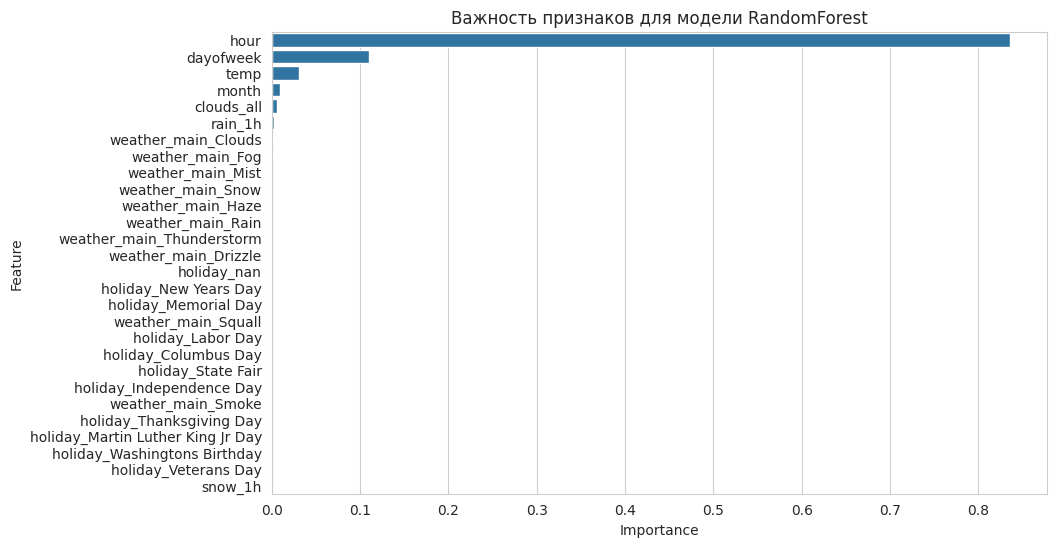

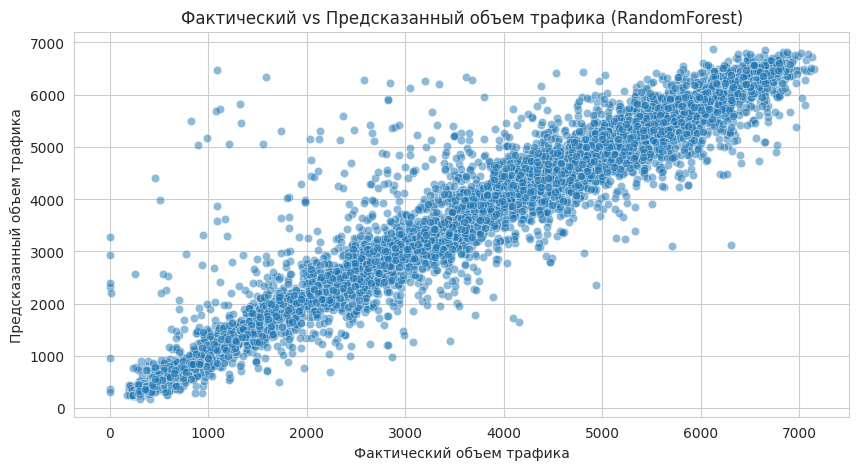

In [69]:
# Анализ метрик регрессии для определения качества модели
print("\nОценка качества моделей:")

# Для Линейной регрессии
print("\nМетрики для Линейной регрессии:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lr)}")
print(f"R²: {r2_score(y_test, y_pred_lr)}")

# Для RandomForest
print("\nМетрики для RandomForest (с оптимальными параметрами):")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_rf)}")
print(f"R²: {r2_score(y_test, y_pred_rf)}")

# Интерпретация коэффициентов модели
# Для линейной регрессии можно интерпретировать коэффициенты:
print("\nИнтерпретация коэффициентов линейной регрессии:")
coefficients = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# Создаем новые данные
new_data = pd.DataFrame({
    'temp': [298.15],
    'rain_1h': [0.0],
    'snow_1h': [0.0],
    'clouds_all': [20],
    'hour': [14],
    'dayofweek': [3],
    'month': [5],
    'weather_main': ['Snow'],
    'holiday': ['Christmas Day']
})

# Масштабируем числовые признаки
new_data_scaled = scaler.transform(new_data[['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'hour', 'dayofweek', 'month']])
new_data_scaled_df = pd.DataFrame(new_data_scaled, columns=['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'hour', 'dayofweek', 'month'])

# Кодируем категориальные признаки с параметром handle_unknown='ignore'
new_data_encoded = encoder.transform(new_data[['weather_main', 'holiday']])
new_data_encoded_df = pd.DataFrame(new_data_encoded, columns=encoder.get_feature_names_out(['weather_main', 'holiday']))

# Объединяем масштабированные и закодированные данные
new_data_final = pd.concat([new_data_scaled_df, new_data_encoded_df], axis=1)

# Убедимся, что порядок колонок совпадает с обучающими данными
new_data_final = new_data_final[X_train.columns]

# Предсказания
new_pred_lr = lin_reg.predict(new_data_final)
print(f"\nПредсказание для новых данных (Линейная регрессия): {new_pred_lr}")

new_pred_rf = best_rf.predict(new_data_final)
print(f"Предсказание для новых данных (RandomForest): {new_pred_rf}")

# Анализ значимости вклада различных признаков
# Для RandomForest можно оценить важность признаков
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nЗначимость признаков в RandomForest:")
print(feature_importances)

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Важность признаков для модели RandomForest")
plt.show()

# Дополнительно: Визуализация предсказаний
# Предсказания RandomForest vs фактические значения
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.5)
plt.xlabel("Фактический объем трафика")
plt.ylabel("Предсказанный объем трафика")
plt.title("Фактический vs Предсказанный объем трафика (RandomForest)")
plt.show()
